# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from mlxtend.plotting import plot_decision_regions

In [ ]:
X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    flip_y = 0.2,
    n_informative = 2,
    n_redundant= 0,
    random_state = 42
)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

<Axes: >

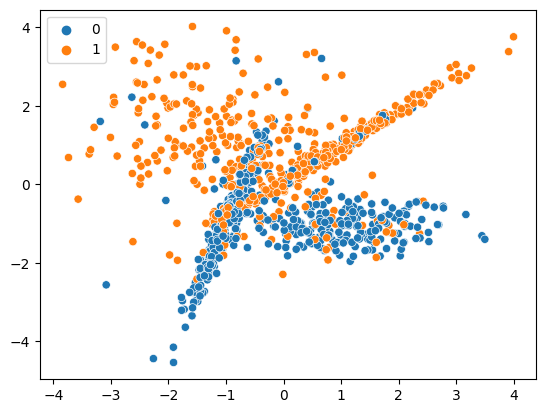

In [ ]:
sns.scatterplot(x = X[: , 0], y = X[: , 1], hue = y)

In [ ]:
max_depth = 3 # if this will be None it causes overfitting

lr_model = LogisticRegression() # linear model

dt_model = DecisionTreeClassifier(max_depth = 3) # Nonlinear model

In [ ]:
lr_model.fit(X, y)
dt_model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

Text(0.5, 1.0, 'DT Model / max_depth: 3')

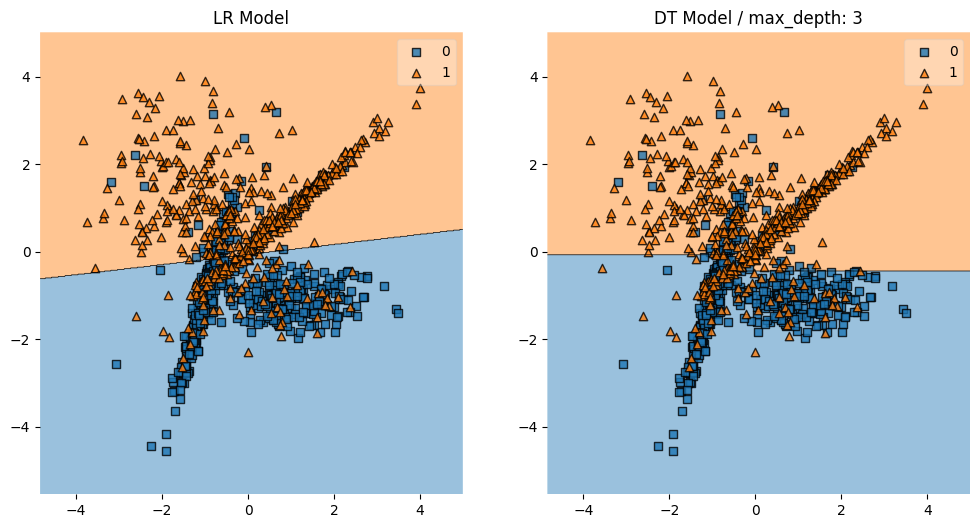

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_regions(X, y, lr_model)
plt.title("LR Model")

plt.subplot(1,2,2)
plot_decision_regions(X, y, dt_model)
plt.title(f"DT Model / max_depth: {max_depth}")

# Gradient Boosting Logic

In [ ]:
X = np.linspace(0, 10, 10)
y = 2 * X + 1 + np.random.randn(10)

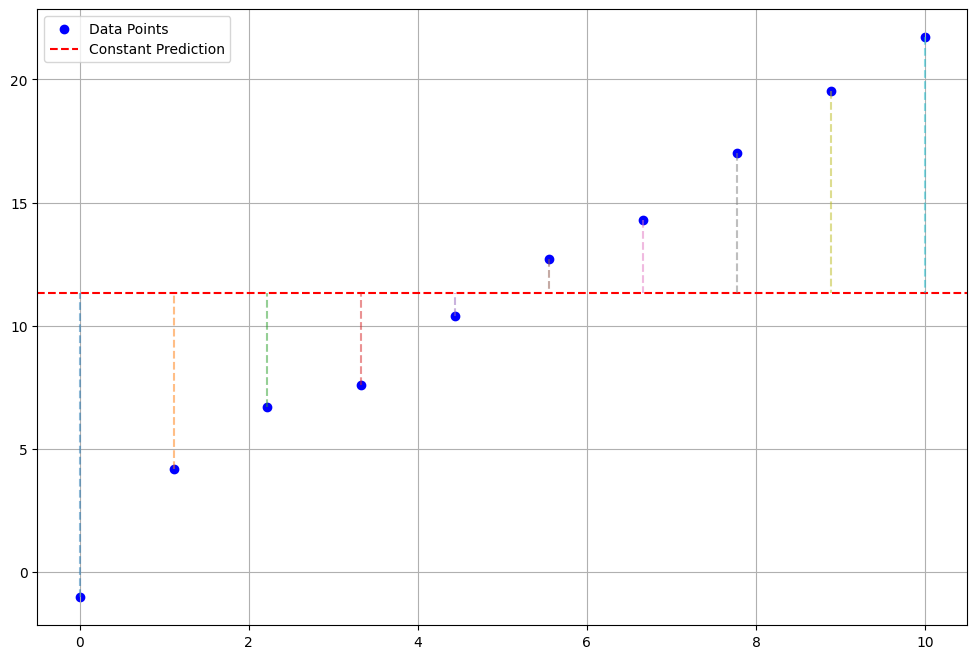

In [ ]:
# Residual

plt.figure(figsize=(12,8))
plt.scatter(X, y, color = "blue", label = "Data Points")
plt.axhline(y.mean(), color = "red", label = "Constant Prediction", linestyle = "--")
plt.legend()

for x_i , y_i in zip(X, y):
  plt.plot([x_i, x_i],  [y_i, y.mean()], alpha=0.5, linestyle="--")

plt.legend()
plt.grid(True)
plt.show()

## Weak Learner Approach

--> The basic logic of gradient boosting is to generate weak trees and try to compensate for their failures with other trees.  Because of this approach, this model is referred to as an 'ensemble' model.

In [ ]:
X , y = make_regression(
    n_samples = 1000,
    n_features = 1,
    random_state = 42,
    noise = 20
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size =  0.8)

# Model Creation

In [ ]:
def fit_simple_gbr(X, y, learning_rate, max_depth, n_estimators):

  mean_target = y.mean()
  boosted_predictions = mean_target
  trees = []

  for _ in range(n_estimators):
    residuals = y - boosted_predictions
    dt_model = DecisionTreeRegressor(max_depth = max_depth,
                                      random_state= 42)
    dt_model.fit(X, residuals)
    current_preds = dt_model.predict(X)
    boosted_predictions += current_preds * learning_rate
    trees.append(dt_model)

  return mean_target, trees

In [ ]:
def predict_simple_gbr(X, mean_target, trees, learning_rate):

  boosted_predictions = mean_target

  for tree in trees:
    boosted_predictions += tree.predict(X) * learning_rate

  return boosted_predictions

In [ ]:
gb_model_sklearn = GradientBoostingRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 2,
    random_state = 42
)

rf_model_sklearn = RandomForestRegressor(
    n_estimators = 100,
    max_depth = 2,
    random_state = 42
)

In [ ]:
gb_model_sklearn.fit(X_train, y_train)
rf_model_sklearn.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [ ]:
mean_target , trees = fit_simple_gbr(X = X_train,
                                    y = y_train,
                                    learning_rate = 0.1,
                                    max_depth = 2,
                                    n_estimators = 100)

In [ ]:
gb_sklearn_preds = gb_model_sklearn.predict(X_test)
rf_sklearn_preds = rf_model_sklearn.predict(X_test)

simple_gb_preds = predict_simple_gbr(X_test, mean_target, trees, learning_rate = 0.1)

# Compare the Results

In [ ]:
mse(y_test, gb_sklearn_preds)

444.1806020865383

In [ ]:
mse(y_test, simple_gb_preds)

444.1806020865383

In [ ]:
mse(y_test, rf_sklearn_preds)

433.3149778175505